In [451]:
#importing required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,9)
%matplotlib inline

In [452]:
#loading the dataset
df=pd.read_csv('/content/EastWestAirlines(1).csv')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# **Data Preprocessing**

# Handling missing values

In [453]:
#checking null values
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [455]:
#summary statitics
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [456]:
#renaming the column name for better accessing
df.rename(columns={'ID#':'ID','Flight_miles_12mo':'Flight_miles(12mo)','Flight_trans_12':'Flight_trans(12)','Award?':'Award'},inplace=True)

In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   ID                  3999 non-null   int64
 1   Balance             3999 non-null   int64
 2   Qual_miles          3999 non-null   int64
 3   cc1_miles           3999 non-null   int64
 4   cc2_miles           3999 non-null   int64
 5   cc3_miles           3999 non-null   int64
 6   Bonus_miles         3999 non-null   int64
 7   Bonus_trans         3999 non-null   int64
 8   Flight_miles(12mo)  3999 non-null   int64
 9   Flight_trans(12)    3999 non-null   int64
 10  Days_since_enroll   3999 non-null   int64
 11  Award               3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


# Outliers detection

<Axes: >

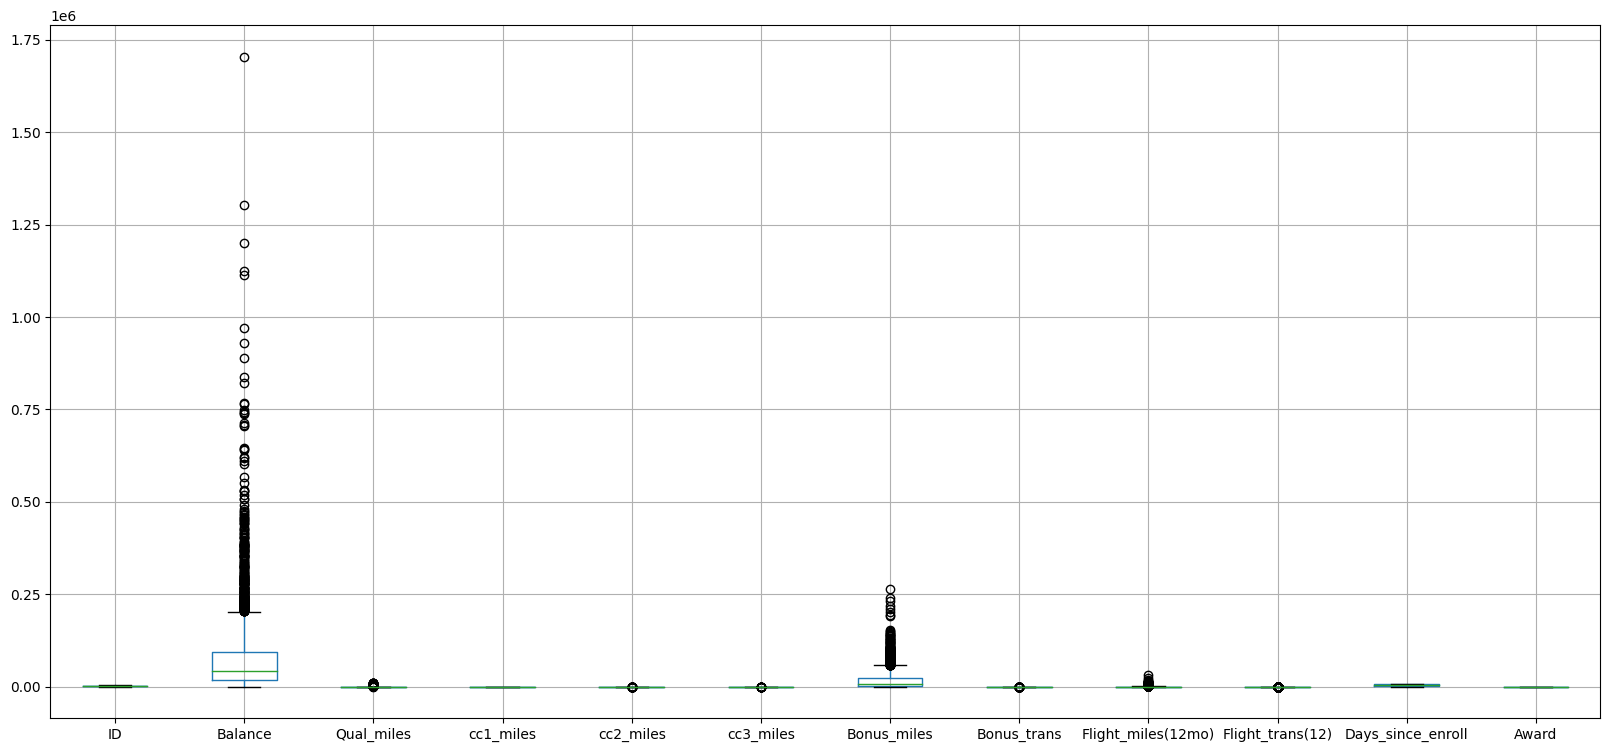

In [458]:
#checking for outliers
df.boxplot()

In [459]:
df.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles(12mo)', 'Flight_trans(12)',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [460]:
dbscan_data=df#before removing outliers making a copy of dataset because used for DBSCAN

# Outliers removal

In [461]:
# Function to cap upper outliers using IQR
def cap_upper_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Compute the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the upper bound (threshold for outliers)
    upper_bound = Q3 + 1.5 * IQR

    # Cap values above the upper bound
    df[column] = df[column].apply(lambda x: min(x, upper_bound))

    return df

# List of numerical columns to cap outliers
columns_to_cap = ['Balance', 'Qual_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles(12mo)', 'Flight_trans(12)',
       ]

# Apply the capping function to each column
for col in columns_to_cap:
    data = cap_upper_outliers(df, col)

<Axes: >

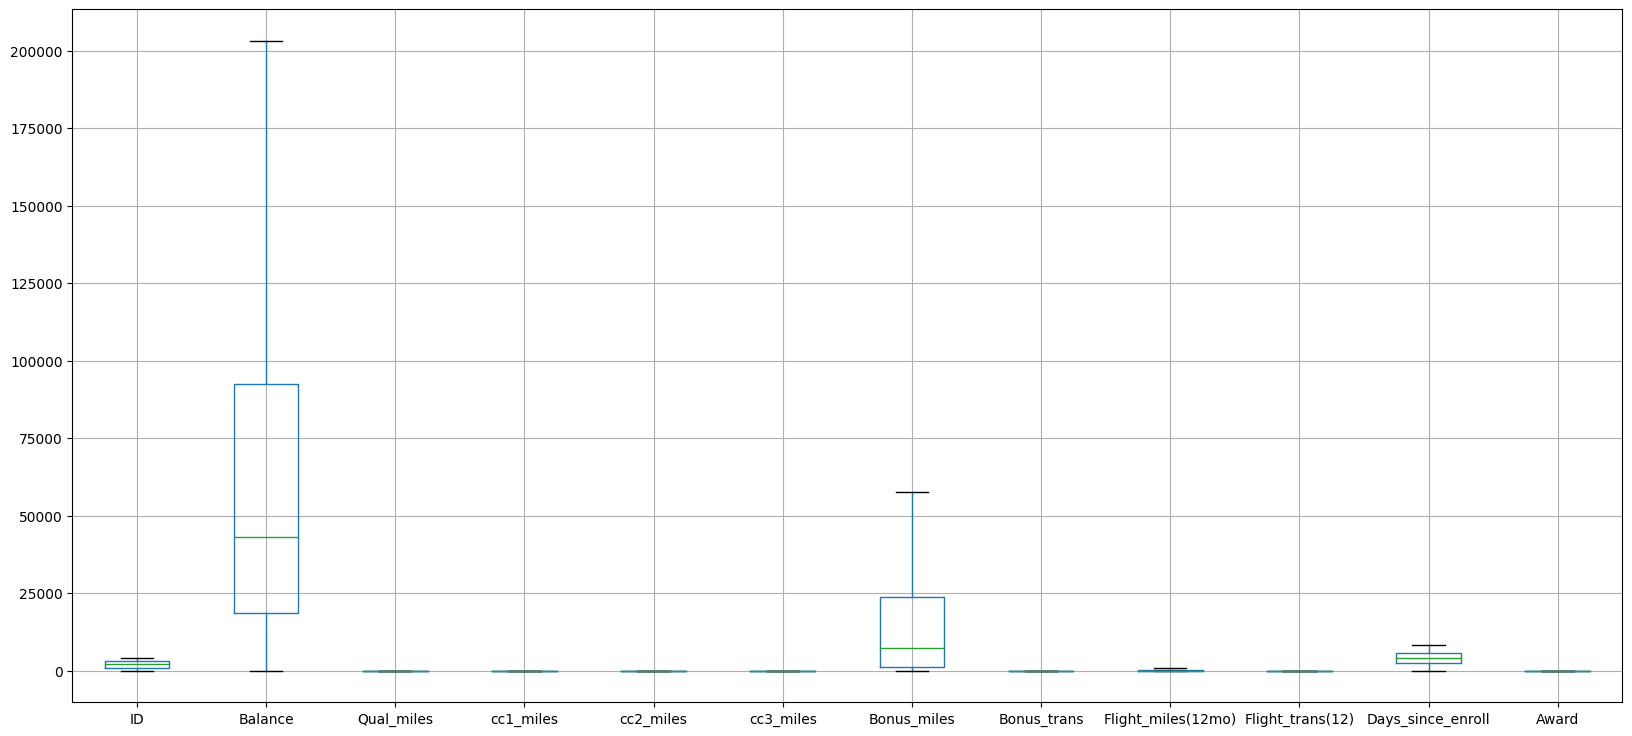

In [462]:
data.boxplot()

In [463]:
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles(12mo),Flight_trans(12),Days_since_enroll,Award
0,1,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0
1,2,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0
2,3,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0
3,4,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0
4,5,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935,1


# Scaling the data

In [464]:
#Scaling the data for kmeans and hieracheal clustering because these are sensitive for outliers
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_data = sc.fit_transform(data.iloc[:,1:])
scaled_data

array([[-0.60725829,  0.        , -0.76957841, ..., -0.62614341,
         1.39545434, -0.7669193 ],
       [-0.75894657,  0.        , -0.76957841, ..., -0.62614341,
         1.37995704, -0.7669193 ],
       [-0.38206963,  0.        , -0.76957841, ..., -0.62614341,
         1.41192021, -0.7669193 ],
       ...,
       [ 0.1675298 ,  0.        ,  0.68312117, ..., -0.62614341,
        -1.31560393,  1.30391816],
       [-0.15118775,  0.        , -0.76957841, ...,  0.43238439,
        -1.31608822, -0.7669193 ],
       [-1.03556163,  0.        , -0.76957841, ..., -0.62614341,
        -1.31754109, -0.7669193 ]])

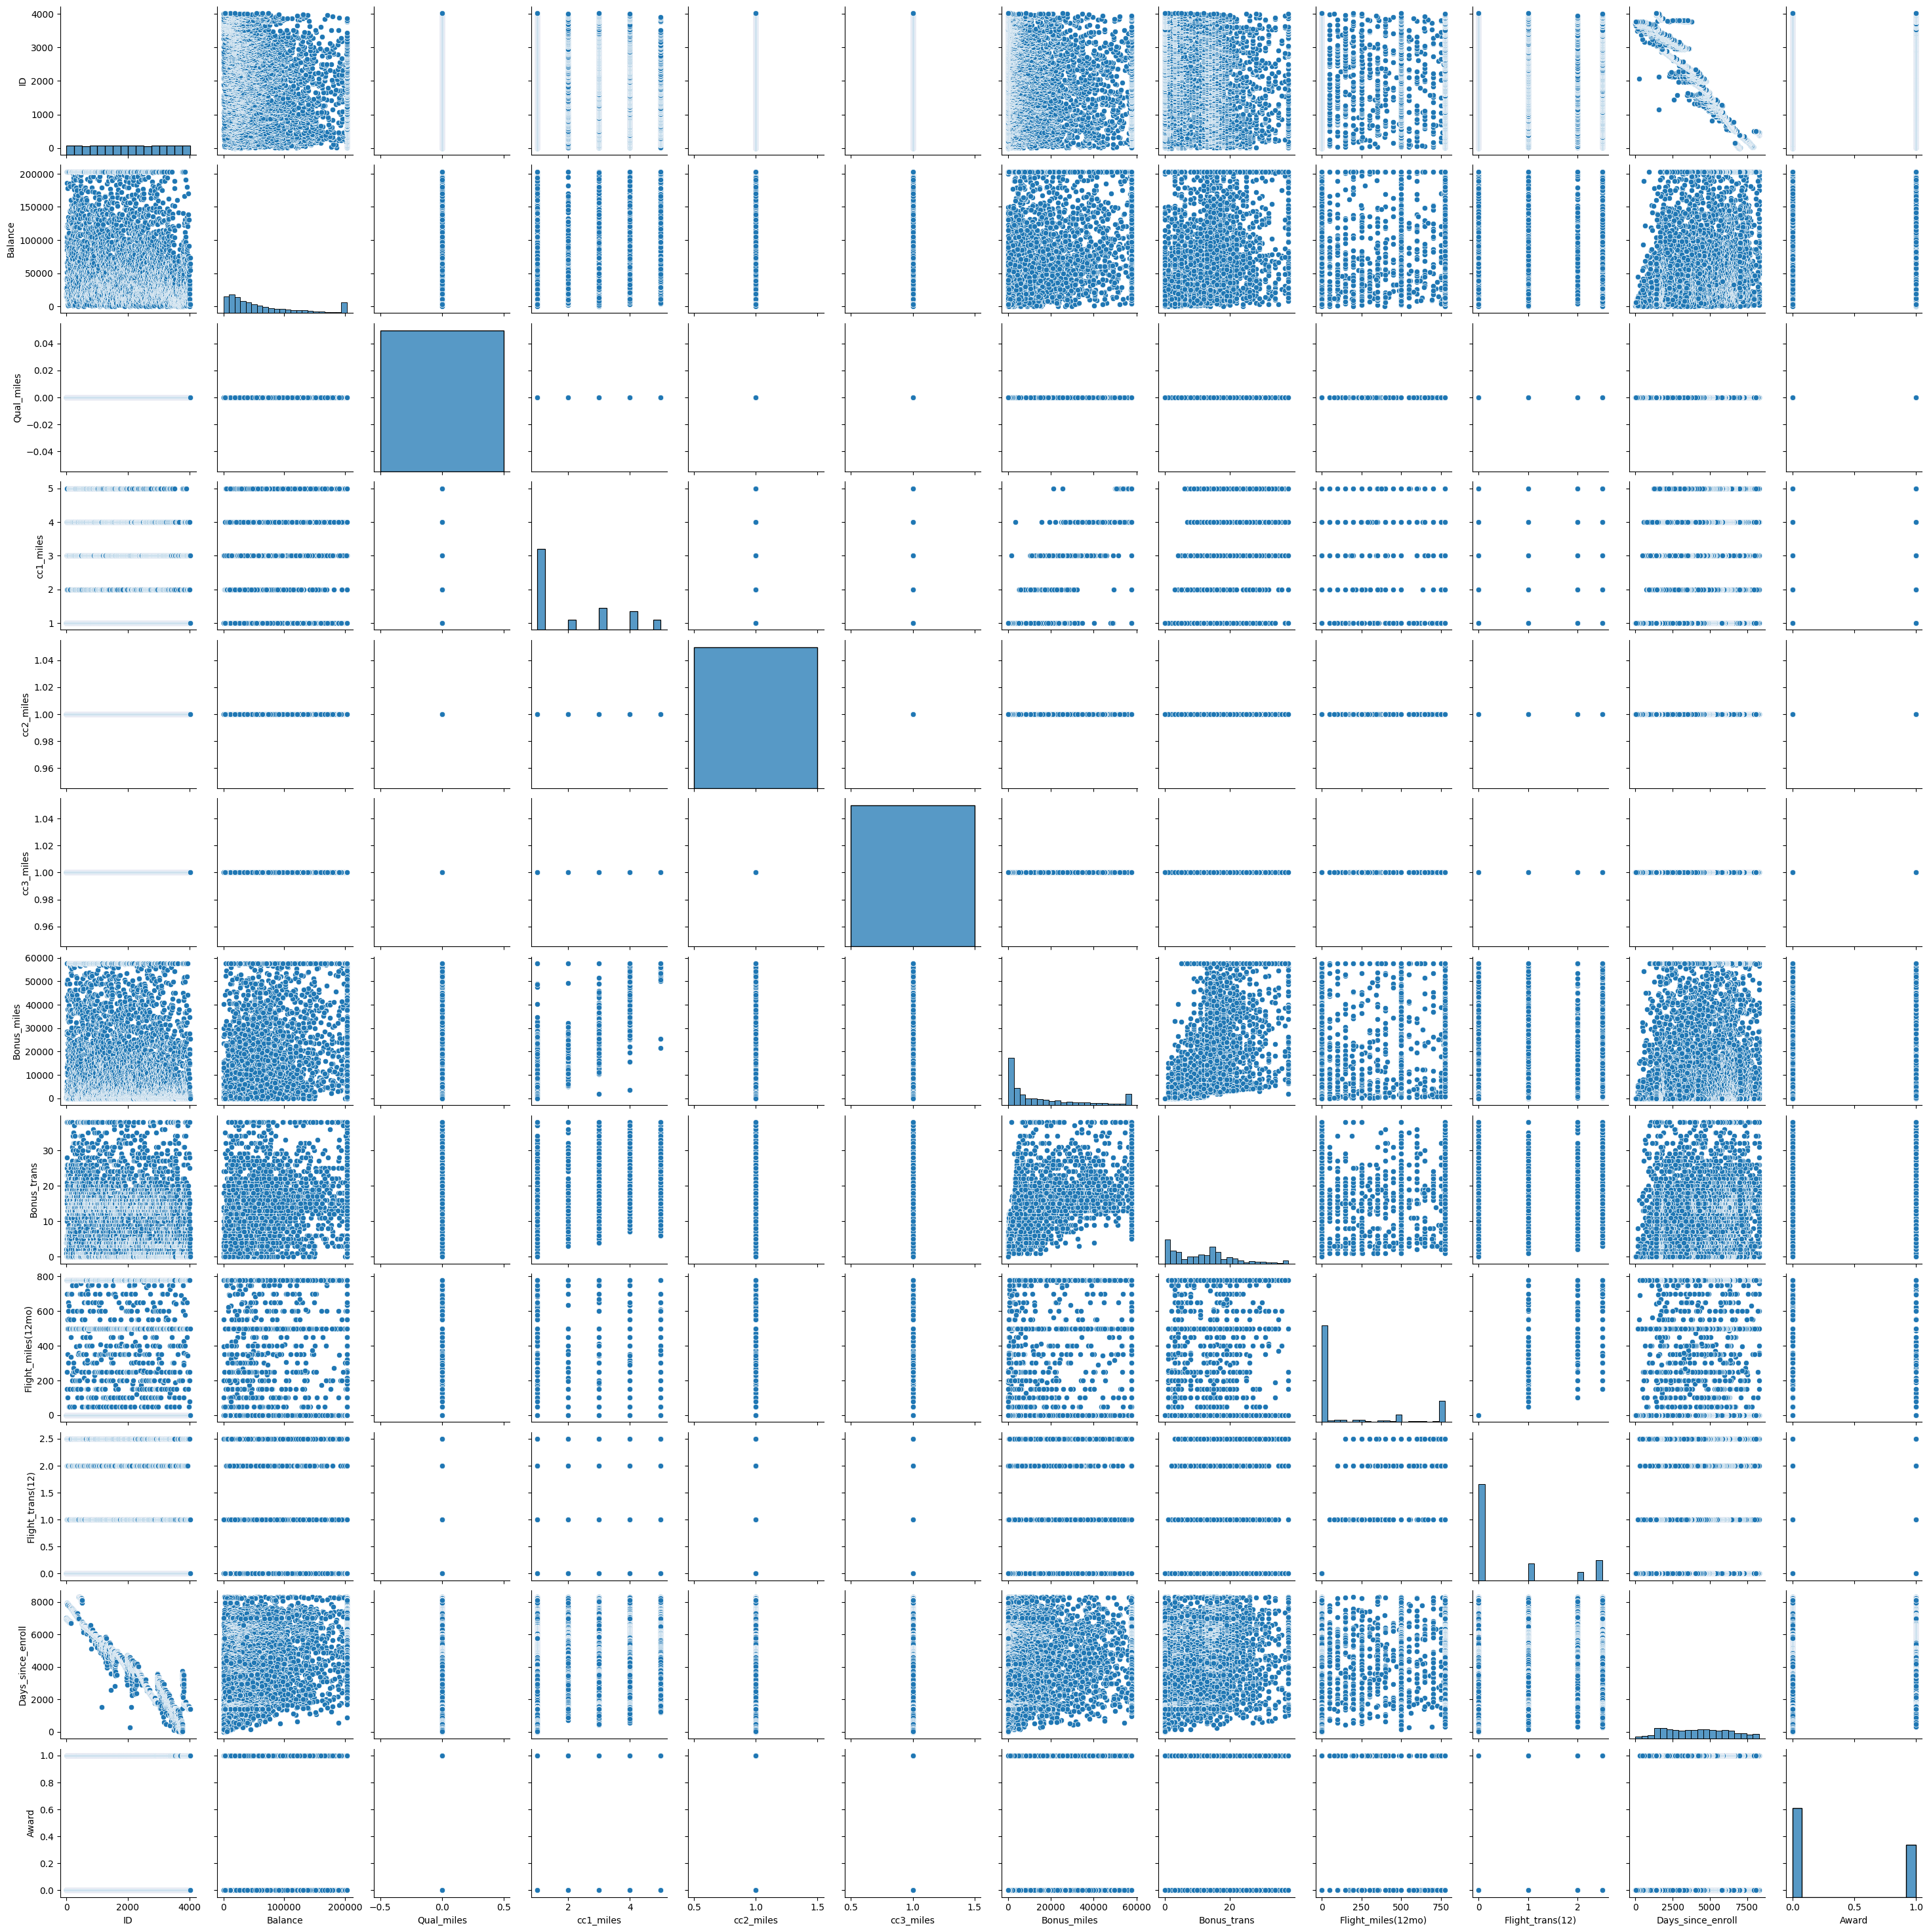

In [465]:
sns.pairplot(pd.DataFrame(data, columns=data.columns))

# **CLUSTERING ALGORITHMS**

# KMenas clustering

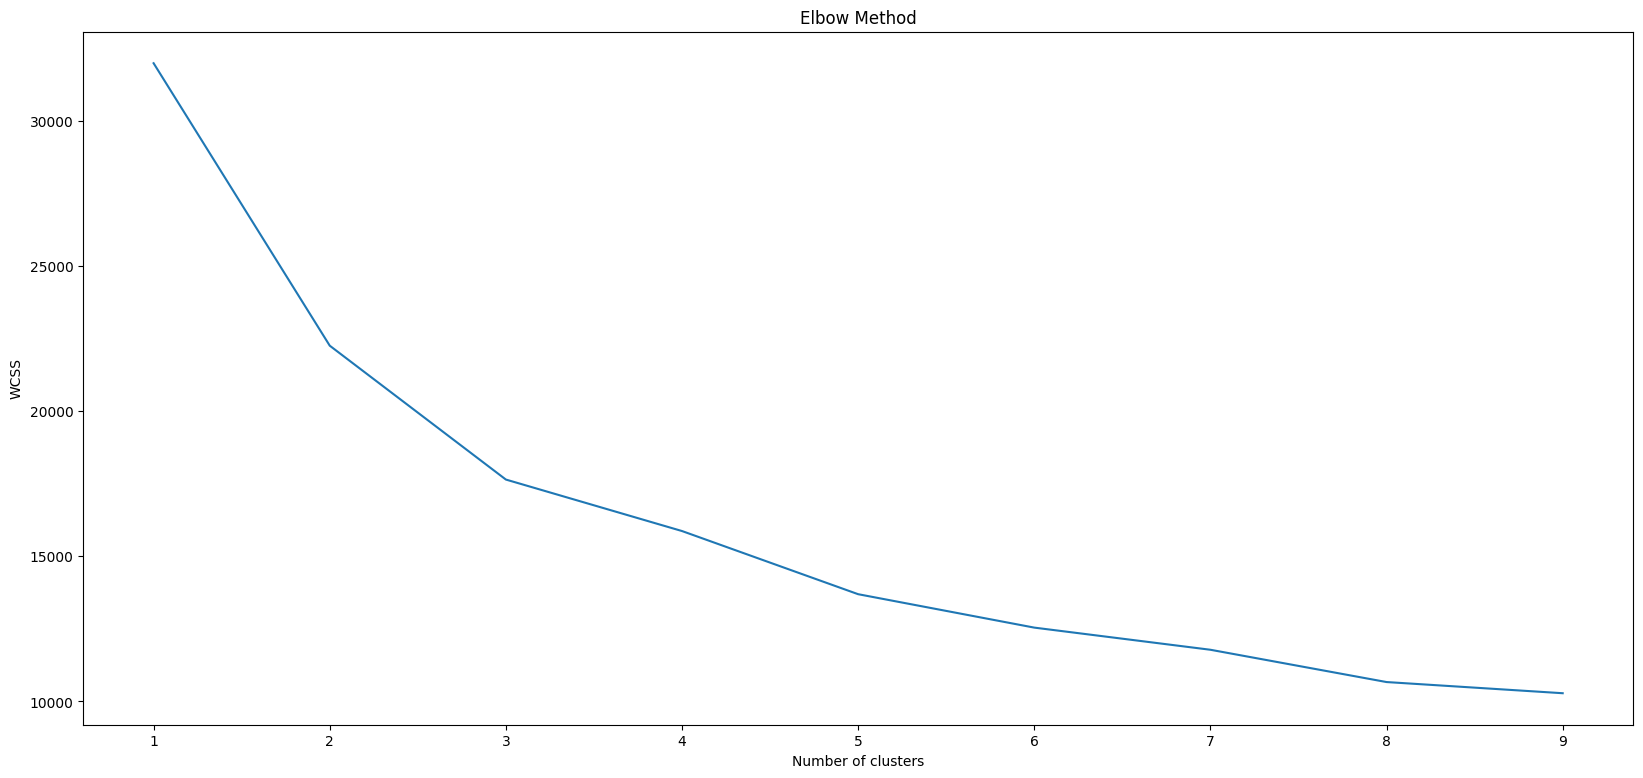

In [466]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of square. Initialize WCSS and begin the loop.It is empty list
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0) #max_iter=300 is default value.
    kmeans.fit(scaled_data) #   fit method to fit the kmeans object to our scaled dataframe
    wcss.append(kmeans.inertia_)# another name for wcss is inertia.
    # In WCSS list we will append all distances i.e if cluster is 10 what is the value,
    # if 9 what is value and so on upto 1.

plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [467]:
wcss

[31991.999999999996,
 22258.979110672142,
 17645.59971723124,
 15871.276729796096,
 13695.071373035895,
 12543.535585722631,
 11780.505131619035,
 10667.745107792136,
 10282.845364855268]

Here taking cluster values as 3 or 6 because there is a drastic change in wcss so we need to take any one of them.

In [468]:
#n_cluster=3
clusters_new=KMeans(n_clusters=3,random_state=0)
new_predict=clusters_new.fit_predict(scaled_data)

In [469]:
new_predict

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [470]:
#n-cluster=6
clusters_new=KMeans(n_clusters=6,random_state=0)
new_predict2=clusters_new.fit_predict(scaled_data)

In [471]:
new_predict2

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

# Hieracheal clustering

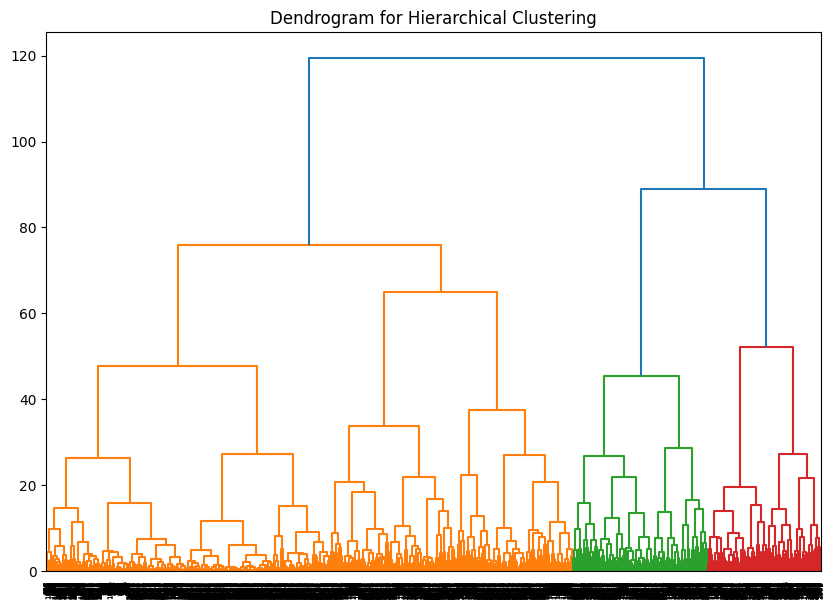

In [472]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
linked = linkage(scaled_data, method='ward')

# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()


In [473]:
# Apply Agglomerative Clustering,taking clusters as 2
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
hc_values = hc.fit_predict(scaled_data)

In [474]:
hc_values

array([1, 1, 1, ..., 1, 0, 1])

# DBSCAN Clustering

In [475]:
dbscan_data#the data which we have copied at first which contains outliers

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles(12mo),Flight_trans(12),Days_since_enroll,Award
0,1,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0
1,2,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0
2,3,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0
3,4,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0
4,5,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476.0,0.0,1,1.0,1.0,8525.0,4.0,200.0,1.0,1403,1
3995,4018,64385.0,0.0,1,1.0,1.0,981.0,5.0,0.0,0.0,1395,1
3996,4019,73597.0,0.0,3,1.0,1.0,25447.0,8.0,0.0,0.0,1402,1
3997,4020,54899.0,0.0,1,1.0,1.0,500.0,1.0,500.0,1.0,1401,0


In [476]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN without parameter tuning or random variables
dbscan = DBSCAN(eps=0.5, min_samples=24)
dbscan_labels = dbscan.fit_predict(dbscan_data)


In [477]:
dbscan_labels#here all are representig as outliers

array([-1, -1, -1, ..., -1, -1, -1])

Hyperparameter Tuning

In [478]:
from sklearn.neighbors import NearestNeighbors#using nearest neighbor for calculating distance with euclidian formula
neighbor = NearestNeighbors(n_neighbors=3).fit(dbscan_data)
d,index = neighbor.kneighbors(dbscan_data)#d-distance,index-index number
neighbor.kneighbors(dbscan_data)

(array([[   0.        ,  934.48167451, 1022.52151567],
        [   0.        ,  631.52909672,  846.33740317],
        [   0.        , 1773.63228996, 1786.18000213],
        ...,
        [   0.        , 1905.10472153, 2155.47210606],
        [   0.        , 1470.99116245, 2172.89484329],
        [   0.        ,  310.75070394,  556.73871789]]),
 array([[   0,  661,  300],
        [   1,  146,  556],
        [   2,  873,  267],
        ...,
        [3996, 3515, 2774],
        [3997, 3333, 2951],
        [3998, 3861, 3491]]))

In [479]:
distance = np.sort(d[:,1])

In [480]:
distance

array([   8.06225775,    8.06225775,   16.18641406, ..., 6140.50714518,
       7196.109296  , 7678.53110953])

Text(0.5, 1.0, 'K-Distance Graph')

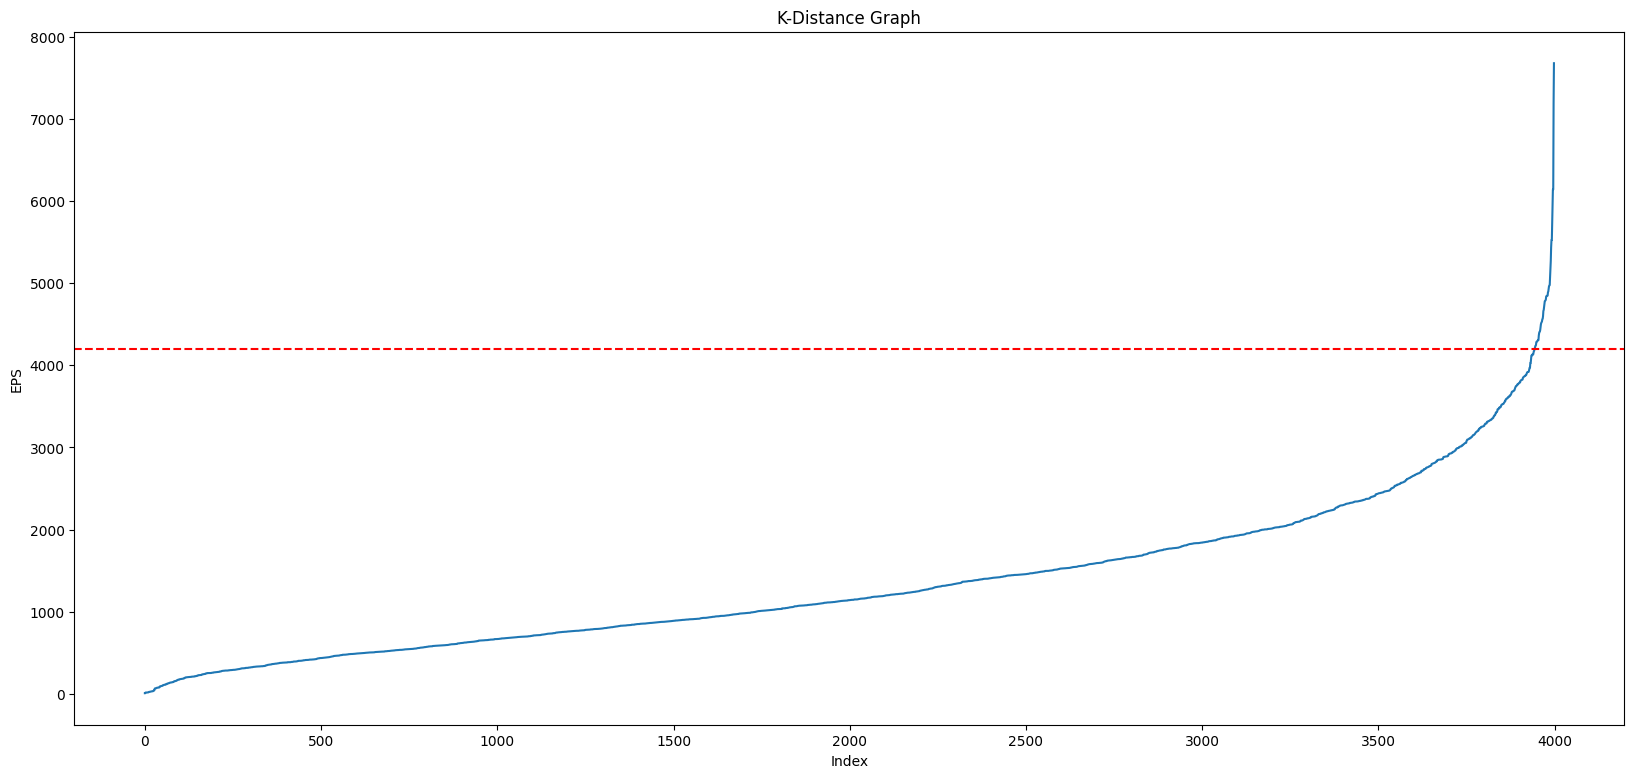

In [481]:
plt.plot(distance)
plt.axhline(y=4200, linestyle = '--', color='red') # y=2 means draw horizontal lint at eps=2
plt.xlabel('Index')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

In [482]:
dbscan = DBSCAN(eps=4200, min_samples=13)
dbscan_labels = dbscan.fit_predict(dbscan_data)

In [483]:
dbscan_labels

array([ 0,  0,  0, ..., -1,  0,  0])

# Cluster Analysis and Interpretation

In [484]:
#KMeans clusters and describing the statistics
df['Cluster(k)'] =new_predict

In [485]:
df.groupby('Cluster(k)').agg('mean')
#cluster-0-This cluster contains high balance and bonus-miles and low award
#cluster-1-This cluster contains low balance and low  bonus-miles and low award
#cluster-2-This cluster contains high balance and bonus-miles and high award

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles(12mo),Flight_trans(12),Days_since_enroll,Award
Cluster(k),,,,,,,,,,,,
0,1668.465816,93958.334777,0.0,3.646308,1.0,1.0,33360.574521,17.455789,58.846855,0.211486,4756.397448,0.551504
1,2272.361405,34699.614894,0.0,1.158807,1.0,1.0,3741.708494,6.217998,35.222329,0.138595,3626.382098,0.162656
2,1826.442961,96884.322209,0.0,2.218447,1.0,1.0,20941.373180,16.748786,696.962985,2.239684,4510.593447,0.652913


In [486]:
# hieracheal clusters and describing the statistics
df['Cluster(h)'] =hc_values
df.groupby('Cluster(h)').agg('mean')
#cluster-0-This cluster contains high balance and bonus-miles and high award
#cluster-1-This cluster contains low balance and bonus-miles and low award

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles(12mo),Flight_trans(12),Days_since_enroll,Award,Cluster(k)
Cluster(h),,,,,,,,,,,,,
0,1808.948437,89369.539453,0.0,2.719531,1.0,1.0,26659.064453,16.328125,501.242578,1.636328,4509.814062,0.604688,1.280469
1,2111.735565,51716.720853,0.0,1.748805,1.0,1.0,10115.450349,9.183891,25.911732,0.099669,3934.371828,0.260022,0.767562


In [487]:
# DBSCAN clusters and describing the statistics
df['Cluster(d)'] =dbscan_labels
df.groupby('Cluster(d)').agg('mean')
#cluster- (-1)-These are noisy data.
#cluster-2,5,6,10-This cluster contains low balance and bonus-miles and high award
#remaining clusters are high balnce and bonus-mlies and low award

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles(12mo),Flight_trans(12),Days_since_enroll,Award,Cluster(k),Cluster(h)
Cluster(d),,,,,,,,,,,,,,
-1,1722.151288,99395.994635,0.0,3.351931,1.0,1.0,33140.783262,17.364807,250.902897,0.805258,4661.828326,0.570815,0.663090,0.463519
0,2231.263529,31886.851373,0.0,1.365098,1.0,1.0,5452.937255,8.047059,120.325294,0.412941,3717.909412,0.253333,1.027843,0.814118
1,1261.389286,203039.748214,0.0,3.100000,1.0,1.0,32821.916964,18.500000,378.298214,1.250000,5543.860714,0.596429,1.039286,0.414286
2,1631.275862,97365.551724,0.0,4.758621,1.0,1.0,57433.525862,22.310345,297.241379,0.931034,4770.620690,0.724138,0.620690,0.241379
3,1339.095238,50143.142857,0.0,3.952381,1.0,1.0,39894.000000,18.047619,187.261905,0.523810,5296.190476,0.857143,0.380952,0.238095
4,1824.000000,134268.789474,0.0,4.815789,1.0,1.0,57435.263158,22.105263,230.842105,0.776316,4466.736842,0.657895,0.473684,0.289474
5,956.625000,86366.625000,0.0,2.250000,1.0,1.0,14072.500000,13.500000,324.750000,1.062500,6124.375000,0.250000,1.125000,0.375000
6,1571.346154,71802.038462,0.0,4.923077,1.0,1.0,57439.384615,21.884615,183.076923,0.576923,4980.769231,0.884615,0.307692,0.115385
7,1161.692308,120680.538462,0.0,1.692308,1.0,1.0,9607.153846,16.692308,239.230769,0.769231,5508.769231,0.538462,1.000000,0.692308


# **Visualization**

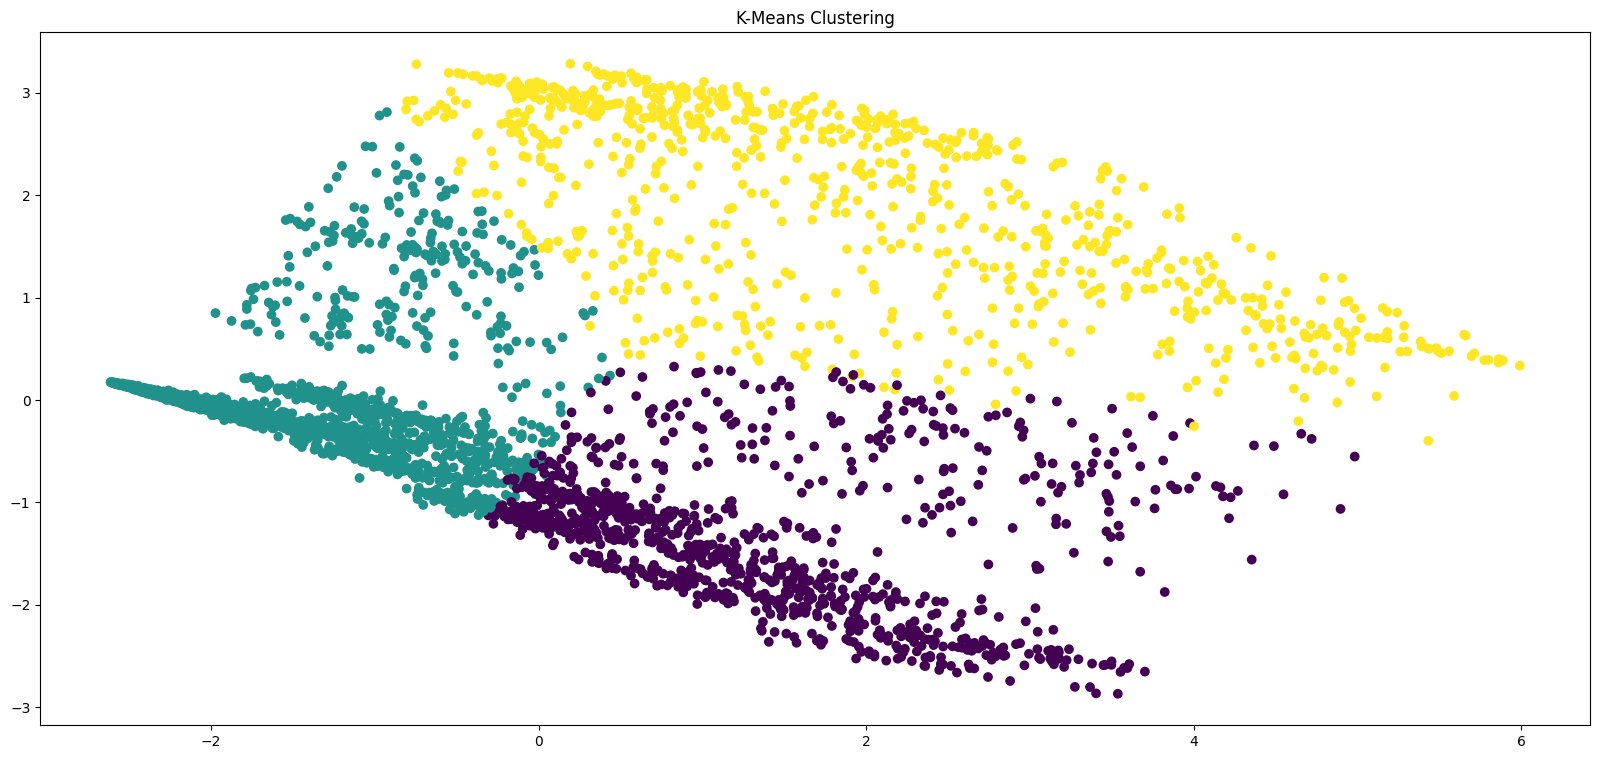

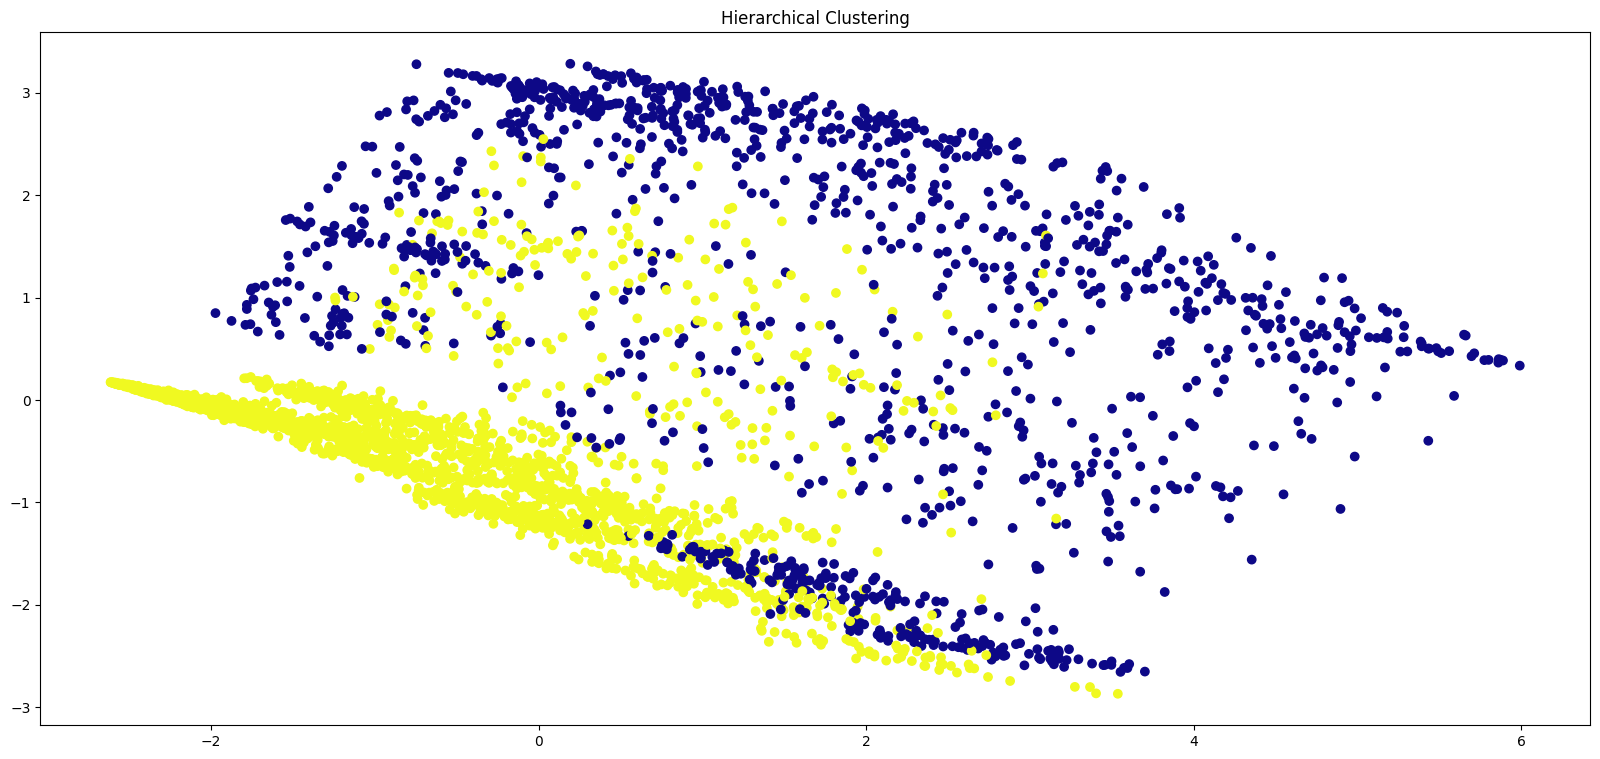

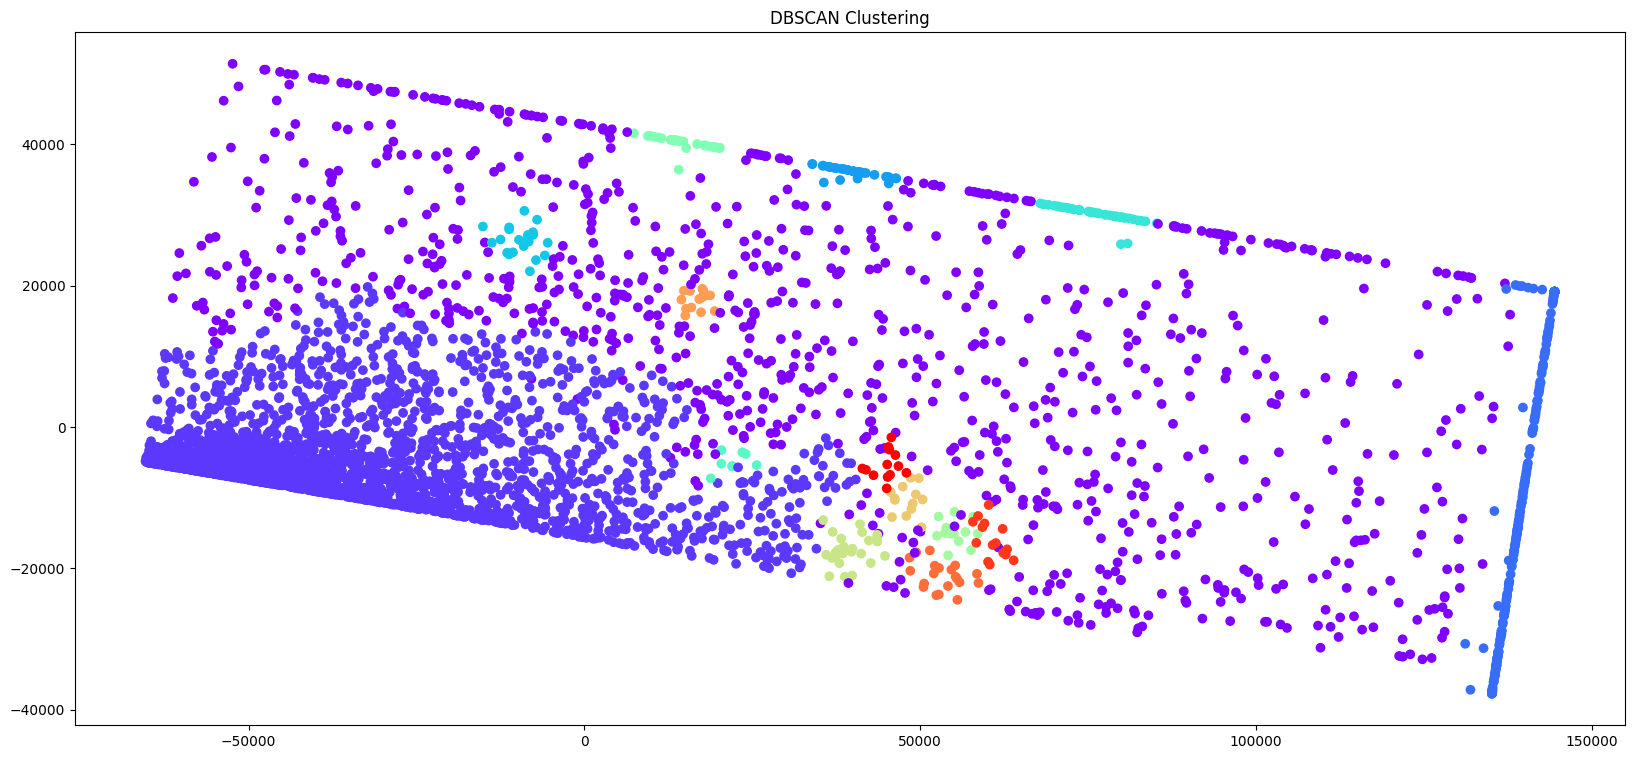

In [488]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
reduced=pca.fit_transform(dbscan_data)

# Visualize clusters for KMeans
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=new_predict, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

# Visualize clusters for Hierarchical
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=hc_values, cmap='plasma')
plt.title('Hierarchical Clustering')
plt.show()


# Visualize clusters for DBSCAN
plt.scatter(reduced[:, 0], reduced[:, 1], c=dbscan_labels, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.show()

# **Evaluation and Performance Metrics**

In [489]:
from sklearn.metrics import silhouette_score

# Evaluate KMeans
kmeans_silhouette = silhouette_score(df, new_predict)
print(f'K-Means Silhouette Score: {kmeans_silhouette}')

# Evaluate Hierarchical
hc_silhouette = silhouette_score(df, hc_values)
print(f'Hierarchical Silhouette Score: {hc_silhouette}')

# Evaluate DBSCAN (only for clusters with more than one point)
dbscan_silhouette = silhouette_score(df, dbscan_labels) if len(set(dbscan_labels)) > 1 else 'N/A'
print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')

K-Means Silhouette Score: 0.20356876034421467
Hierarchical Silhouette Score: 0.16845288010499548
DBSCAN Silhouette Score: 0.07351095506247614
